<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-equipo-48/blob/main/Actividad_Semanal_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Equipo 48
* Materia: Ciencia y Analítica de Datos.
* Nombre de la entrega: Actividad Semanal 4
* Fecha: 11/10/2022.
* Francisco Medellin Zertuche - A01794044.
* Roberto Romero Vielma - A00822314
* Profesor titular: Jobish Vallikavungal Devassia. 
* Profesor tutor: Roberto Antonio Guevara González.


Importamos la librería pandas

In [ ]:
import pandas as pd

Cargamos la base de datos con la función **pandas.read_csv**

In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv")

Creamos un nuevo dataframe que sea copia del original, para eliminar los registros que se encuentran vacíos y verificar que esto no nos afecte para futuros análisis

In [ ]:
ndf=df.copy()
ndf.dropna(inplace = True)
ndf2= ndf.copy()

Primero modificamos la columna X3 para quedarnos solamente con valores dentro de la categoría 4 (otros estudios)

In [ ]:
ndf2["X3"] = ndf2[["X3"]].replace([0,5,6],4)

Hacemos lo mismo con la columna X4 para reemplazar los valores 0 con 3 (Otros)

In [ ]:
ndf2["X4"]=ndf2[["X4"]].replace(0,3)

Con las columnas X6 a X11 sustituimos el valor de -2 por -1 (Pago oportuno)

In [ ]:
slc = ndf2.loc[ : , "X6":"X11"]
for c in slc.columns:
  ndf2[c] = ndf2[[c]].replace(-2,-1)

Tal como se puede observar las columnas X6 a la X11 presentan otro valor que no se menciona en la documentación, el valor **0**, procedemos a reemplazarlo con **-1** dado que es muy probable que sea un error de captura

In [ ]:
slc = ndf2.loc[ : , "X6":"X11"]
for c in slc.columns:
  ndf2[c] = ndf2[[c]].replace(0,-1)

In [ ]:
df = ndf2.copy()

# Parte 1: Ejercicio guiado 


## Paso 1: 
Determina el número mínimo de componentes principales que representan la mayor parte de la variación en sus datos

Importamos las librerías a utilizar en la actividad

In [ ]:
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

Seleccionamos las columnas no categóricas para poder realizar el PCA 

In [ ]:
# Análisis rápido del dataframe
columnas_no_categoricas=["X1","X5","X12","X13","X14","X15","X16","X17","X18","X19","X20","X21","X22","X23"]
df = df[columnas_no_categoricas]
df.head()

,X1,X5,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,20000,24.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000,26.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000,34.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000,37.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000,57.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


Verificamos que solo tenemos variables cuantitativas numéricas

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29958 entries, 0 to 29999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      29958 non-null  int64  
 1   X5      29958 non-null  float64
 2   X12     29958 non-null  float64
 3   X13     29958 non-null  float64
 4   X14     29958 non-null  float64
 5   X15     29958 non-null  float64
 6   X16     29958 non-null  float64
 7   X17     29958 non-null  float64
 8   X18     29958 non-null  float64
 9   X19     29958 non-null  float64
 10  X20     29958 non-null  float64
 11  X21     29958 non-null  float64
 12  X22     29958 non-null  float64
 13  X23     29958 non-null  float64
dtypes: float64(13), int64(1)
memory usage: 3.4 MB


El método preprocessing nos sirve para estandarizar el dataframe<br>

La estandarización de los datos es un paso requerido para el método PCA<br>

Al estandarizar, la media de todos los datos será 0 con un rango de -1 a 1<br>

In [ ]:
# Recordatorio: asegurarse de limpiar el dataframe, aqui el dataframe ya ha sido limpiado.
pcs = PCA()
pcs.fit(preprocessing.scale(df)) 

PCA()

La estandarización nos sirve para evitar grandes varianzas entre los componentes principales, además de que elimina la mayoría de los outliers dentro del dataset

Analizamos la desviación estándar, la varianza y la proporción acumulativa de varianza de los PCAs

Medidas de dispersión o variabilidad:

In [ ]:
pcsSummary_df = pd.DataFrame({'Desviación estándar': np.sqrt(pcs.explained_variance_),
                             'Proporción de la varianza': pcs.explained_variance_ratio_,
                             'Proporción acumulativa': np.cumsum(pcs.explained_variance_ratio_)
                             })

pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4) 

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
Desviación estándar,2.4329,1.3099,1.0223,0.9619,0.9401,0.9342,0.8830,0.8524,0.8410,0.5142,0.2665,0.2026,0.1592,0.1525
Proporción de la varianza,0.4228,0.1226,0.0746,0.0661,0.0631,0.0623,0.0557,0.0519,0.0505,0.0189,0.0051,0.0029,0.0018,0.0017
Proporción acumulativa,0.4228,0.5453,0.6200,0.6861,0.7492,0.8115,0.8672,0.9191,0.9696,0.9885,0.9936,0.9965,0.9983,1.0000


Observamos que despues del PC6 tenemos casi el 80% de la varianza

<H3>Scree Plot</H3>
Graficamos la proporción de la varianza de cada componente, junto con la proporción acumulativa

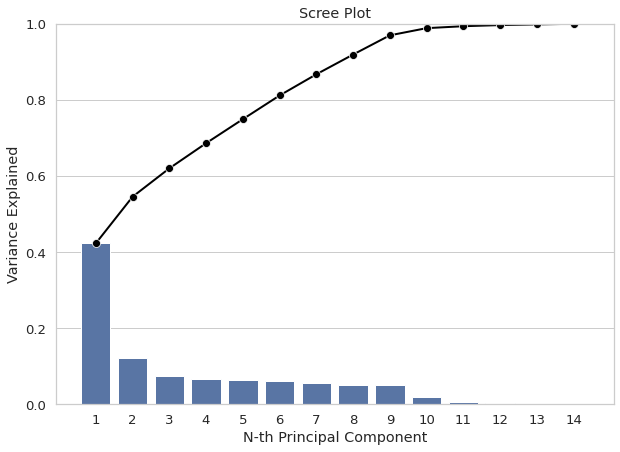

In [ ]:
PC_components = np.arange(pcs.n_components_) + 1 # sumamos +1 por que el arrange te da menos -1 el rango
#PC_components

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components, 
                y = pcs.explained_variance_ratio_, 
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(pcs.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

Observamos que el primer componente es el que tiene mayor cantidad de varianza

Analizemos que tenemos después del PC6

In [ ]:
summary_df = pcsSummary_df.round(4)
summary_df.iloc[: , 6:]

,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
Desviación estándar,0.8830,0.8524,0.8410,0.5142,0.2665,0.2026,0.1592,0.1525
Proporción de la varianza,0.0557,0.0519,0.0505,0.0189,0.0051,0.0029,0.0018,0.0017
Proporción acumulativa,0.8672,0.9191,0.9696,0.9885,0.9936,0.9965,0.9983,1.0000


Tomaremos los primeros 9 componentes principales ya que contienen hasta un 97% de la proporción de la varianza, dado que hasta el PC9 se tiene un incremento significativo en la proporción acumulativa

In [ ]:
summary_df = pcsSummary_df.round(4)
summary_df.iloc[: , :9]

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
Desviación estándar,2.4329,1.3099,1.0223,0.9619,0.9401,0.9342,0.8830,0.8524,0.8410
Proporción de la varianza,0.4228,0.1226,0.0746,0.0661,0.0631,0.0623,0.0557,0.0519,0.0505
Proporción acumulativa,0.4228,0.5453,0.6200,0.6861,0.7492,0.8115,0.8672,0.9191,0.9696


Mostramos la proporción acumulativa hasta PC9

In [ ]:
pcsSummary_df.iloc[2,8] # Proporción acumulativa en PC9

0.9696363062975943

**Con esto encontramos que necesitamos los primeros 9 componentes principales que tienen más del 97% de la varianza total.**

## Paso 2
Interprete cada componente principal en términos de las variables originales

Visualizamos la composición de cada componente arrojado por el PCA

In [ ]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), 
                                columns=pcsSummary_df.columns,
                                index=df.columns
                                )
pcsComponents_df= pcsComponents_df.iloc[:,:]
pcsComponents_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
X1,0.165507,0.300709,-0.378575,-0.200103,0.035312,-0.078883,0.111239,-0.046381,-0.821996,-0.029201,-0.006198,0.015697,-0.000417,0.003345
X5,0.032789,0.071906,-0.869471,0.338990,-0.039760,0.071461,-0.078816,0.027368,0.330346,-0.009011,0.000139,-0.001377,0.000132,0.001067
X12,0.372446,-0.190793,-0.034207,-0.063899,0.041391,-0.043987,0.008169,0.009341,0.010348,0.566716,0.416018,-0.432992,-0.183793,-0.316576
X13,0.383253,-0.174644,-0.001814,0.007629,0.083164,-0.028824,-0.032444,-0.135636,0.016872,0.386872,0.038425,0.345052,0.329467,0.645227
X14,0.388264,-0.126883,0.034747,0.060528,0.113790,0.099239,-0.121162,0.093077,-0.018607,0.122863,-0.484776,0.495792,-0.086466,-0.527640
X15,0.391557,-0.120403,0.034073,0.074774,0.028378,0.014527,0.126494,0.039157,0.019109,-0.205260,-0.523211,-0.489647,-0.362078,0.346095
X16,0.388505,-0.105928,0.033882,0.039553,-0.106756,-0.099290,-0.007584,0.049781,0.023701,-0.419992,0.068372,-0.249500,0.718388,-0.226667
X17,0.380672,-0.094157,0.018489,-0.070616,-0.164986,0.069272,0.007892,-0.000282,0.058701,-0.488861,0.513313,0.338689,-0.427734,0.072287
X18,0.135120,0.383194,0.173845,0.362055,0.225652,0.040574,-0.201646,-0.748694,0.019949,-0.056581,0.047513,-0.069359,-0.044841,-0.084567
X19,0.116768,0.408391,0.200925,0.345745,0.148714,0.408361,-0.278835,0.578491,-0.110712,0.050854,0.147307,-0.068851,0.038925,0.124894


Examinamos la magnitud y dirección de los coeficientes de las variables originales y buscamos la variable más importante, con mayor peso por cada componente.

Verificamos el valor máximo dentro de PC1, junto con la columna que contiene el valor más alto

In [ ]:
c = (pcsComponents_df.PC1.nlargest(1))
dict(c)

{'X15': 0.39155712203044346}

Hacemos lo mismo con el valor mínimo de PC1

In [ ]:
c = (pcsComponents_df.PC1.nsmallest(1))
dict(c)

{'X5': 0.03278881366010833}

Obtenemos que 0.3915 es la que tiene mayor peso y se encuentra en la columna X15

Para automatizar este proceso definimos una función que nos arroje la variable con mayor peso para cada componente

In [ ]:
def _max_weigth(pc_name, list_min_max):
  ab=[]
  for dic in list_min_max:
    for key, val in dic.items():
      ab.append(abs(val))
  _max = max(ab)
  for dic in list_min_max:
    for key, val in dic.items():
      if abs(val) == _max:
        return [pc_name, key, val ]
  
pca_var_list = []
for c in pcsComponents_df.columns:
  pca_var_list.append(_max_weigth( c, [ dict(pcsComponents_df[c].nlargest(1)) , dict(pcsComponents_df[c].nsmallest(1)) ])) 
pca_var_list

[['PC1', 'X15', 0.39155712203044346],
 ['PC2', 'X19', 0.408390522014431],
 ['PC3', 'X5', -0.8694706905799756],
 ['PC4', 'X22', -0.6098329381828322],
 ['PC5', 'X23', 0.6591551189996552],
 ['PC6', 'X22', 0.602387806215927],
 ['PC7', 'X20', 0.7852160768961115],
 ['PC8', 'X18', -0.7486943024148407],
 ['PC9', 'X1', -0.821996152813422],
 ['PC10', 'X12', 0.5667159724057267],
 ['PC11', 'X15', -0.5232111062849556],
 ['PC12', 'X14', 0.4957924515135175],
 ['PC13', 'X16', 0.71838794406556],
 ['PC14', 'X13', 0.6452270837507983]]

De esa manera obtenemos las variables con mayor peso para cada componente

Con esto deducimos lo siguiente:
- Las variables que más importan al momento de que se te otorge un crédito, son las relacionadas con el importe del estado de cuenta y el importe del pago anterior.

## Paso 3
Identificar los valores atípicos

Creamos una copia del dataframe **df**

In [ ]:
df_outlier=df.copy()

Normalizamos los datos del dataframe, para poder visualizar mejor el boxplot, para ello usaremos la función **MinMaxScaler** para que los valores queden dentro del rango de 0 a 1, sin perder la distribución de cada columna

In [ ]:
scaler=MinMaxScaler()
df_outlier=scaler.fit_transform(df_outlier)

Transformamos los datos normalizados nuevamente en un dataframe

In [ ]:
df_outlier=pd.DataFrame(df_outlier)

Asignamos nombres a cada columna dentro del dataframe para poder visualizar mejor a que columna pertenecen los outliers

In [ ]:
df_outlier.columns=["Given credit","Age","AB September","AB August","AB July","AB June","AB May","AB April","AP September","AP August","AP July","AP June","AP May","AP April"]

Graficamos el dataset usando el método **boxplot** dentro de la librería pandas

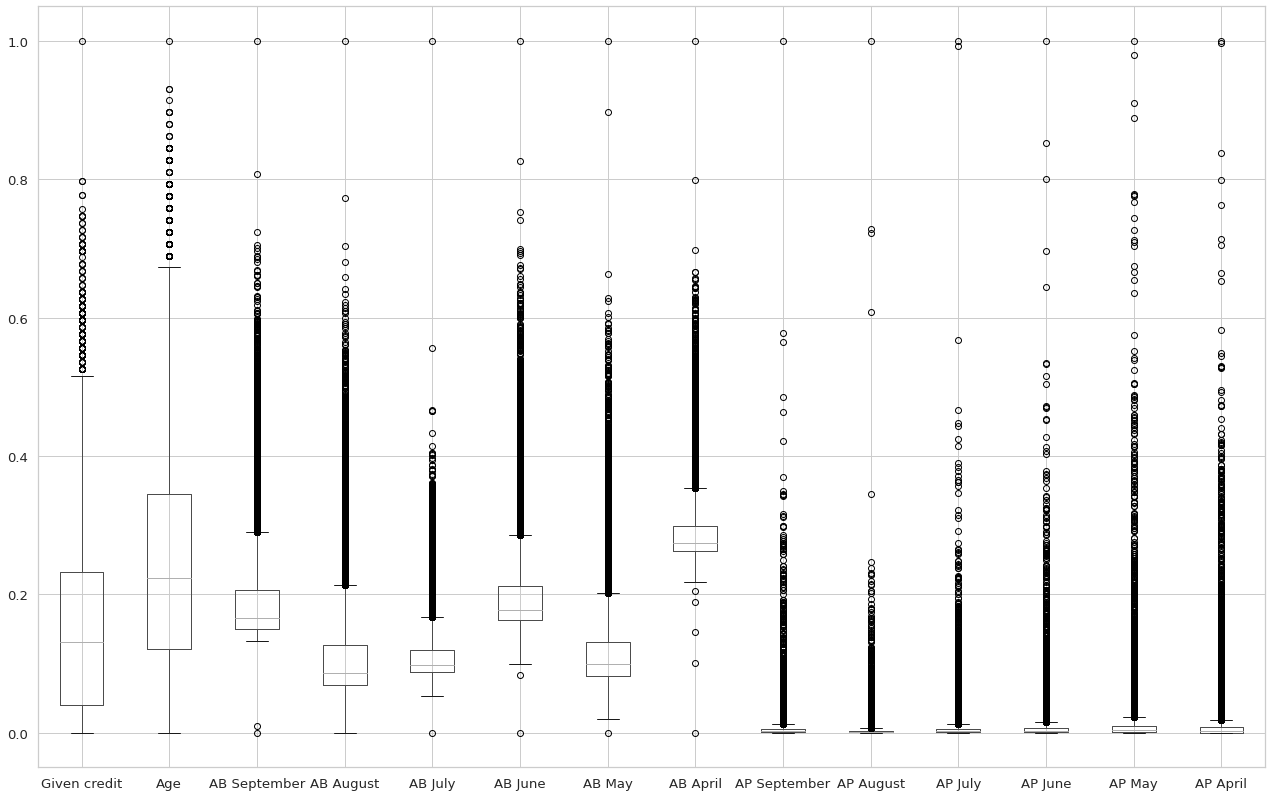

In [ ]:
df_outlier.boxplot(figsize=(22,14))

# Parte 2: Responde las siguientes preguntas en una celda de texto en Jupyter Notebook

1. ¿Cuál es el número de componentes mínimo y por qué?

En nuestro análisis observamos que los primeros componentes tienen la mayor cantidad de proporción de varianza de datos. Siendo hasta el PCA 6 que tenemos una proporción acumulada del 80%.<br>
Como lo recomendable con el método PCA es tener la mayor cantidad de componentes que sean significativos, tenemos que hasta PC9 se tiene una proporción acumulativa del 97%, lo que significa que se puede reducir el número de componentes de 14 a 9.<br>

2. ¿Cuál es la variación de los datos que representan esos componentes?

La variación de los datos que representan estos componentes es del 97%.<br>

3.¿Cuál es la pérdida de información después de realizar PCA?

Al ser la estandarización pieza clave en el método PCA, que nos brinda una mejor precisión de cuantos vectores principales son necesarios. Por lo que la cantidad de información que es capaz de capturar cada componente es explicada en proporción de la varianza, siendo así que estamos perdiendo un 3% de la proporción total de la varianza de datos.<br>

4. De las variables originales, ¿Cuál tiene mayor y cuál tiene menor importancia en los componentes principales?

Las variables que toman más importancia en relación con los componentes principales, son aquellas relacionadas al importe del estado de cuenta y el importe del pago anterior. Siendo X20 "Amount paid in july 2005.” relacionada a PC7 la que contiene el mayor peso de 0.7852.<br>
El componente PC3 es el que tiene menos proporción de varianza y está relacionado a su vez a la variable X5 con un peso de -0.8694. Siendo está la variable que menos importancia tiene en los componentes principales.<br>

5. ¿Cuándo se recomienda realizar un PCA y qué beneficios ofrece para Machine Learning?

El método PCA se recomienda que se utilice en casos, en donde se tengan una gran cantidad de variables y que sea necesario una reducción de la dimensionalidad de los datos, para un mejor ajuste a los modelos de predicción.


# Referencias bibliográficas
Aprende Machine Learning Staff. (2018, 8 octubre). *Comprende Principal Component Analysis*. Aprende Machine Learning. Recuperado 11 de octubre de 2022, de https://www.aprendemachinelearning.com/comprende-principal-component-analysis/

Código Máquina. (2022, 4 julio). *Análisis de Componentes Principales y Reducción de Dimensionalidad Principal Component Analysis PCA*. YouTube. Recuperado 11 de octubre de 2022, de https://www.youtube.com/watch?v=x-7BHjMA15M

Starmer, J. (2018, 2 abril). *StatQuest: Principal Component Analysis (PCA), Step-by-Step*. YouTube. Recuperado 11 de octubre de 2022, de https://www.youtube.com/watch?v=FgakZw6K1QQ

Universitat Politècnica de València. (2021, 4 noviembre). *Varianza, Covarianza y Correlación*. YouTube. Recuperado 11 de octubre de 2022, de https://www.youtube.com/watch?v=6V9a4651WFw
